# Lab 1: Exploratory Data Analysis (EDA)

Project Outline 
* Formulate a particular question that might be interesting to answer by exploring this dataset.
* Calculate statistics for the numerical and categorical attributes.
* Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (in a markdown cell).
* Generate two plots with the combined distribution of attributes and draw conclusions from them (in a markdown cell).
* Make sure your conclusions are related to the question you have formulated.

## A. Importing Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./bank.csv')

## B. Initial Data Exploration

Lets look at the head (first 5 rows) and tail (last 5 rows) of the dataset. 

In [195]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [196]:
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


This dataset is part of the Bank Marketing dataset from the UCI repository. It has 2000 rows (observations) and 17 columns of categorical and numerical attributes (features). 

The data is related with direct marketing campaigns of a Portuguese banking institution. The outcome varaible `subscribed` indicates whether a customer subscribed to the bank product. 

We will use descriptive statistics for the numerical and categorical attributes, and a variety of plots of the numerical and categorical attributes, to get an intuitive insight into a data set.

### B.1. Research Questions

We have information on the previous marketing campaign, such as `poutcome` which lists the outcome, `previous` which contains the numebr of previous contacts to this client. The `housing` attribute can be used to incorporate another dimension on the analysis. 

* What is the distribution of subscriptions for different outcomes of the previous campaign, and do the proportions differ across those groups with housing loans? 

We also have information on the clients, such as `housing`, `education`, and `age`. These contain information on personal attributes, and whether the indiviudal has a housing loan, which acts as a proxy for homeownership. 

* What are the differences in age for home ownership and education levels?

With information on `contact` method used, from 'celular' to 'telephone', we can compare the proportion of subscriptions gained from each contact method. 

* Which method of contact is more sucessful?

### B.2. Quick Examination of Numerical Attributes

The numerical attributes of this dataset are:
* `age`: Client age (years)
* `balance`: Average annual balance (euro)
* `day`: Day of month 
* `duration`: Last contact duration (seconds)
* `campaign`: Number of contacts during current campaign
* `pdays`: Number of days since last contact in previous campaign
* `previous`:  Number of contacts for this client before this campaign

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


We form the following conclusions from `describe()`
*  `Age` has 2000-1988 = 12 missing values .

Looking at the mean and median values, we can understand the skewness of the data. For example, the mean `balance` (1414) is much greater than the median value (551), signifying positive skewness. We will further examine this with a boxplot/histogram.

The strenght of linear relationships between numerical attributes can be explored using a correlation matrix.

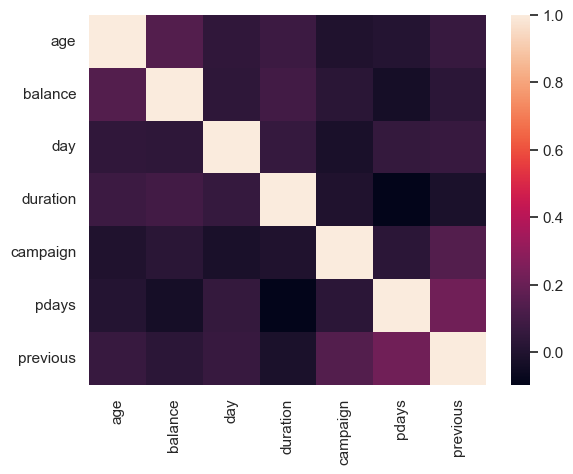

In [197]:
sns.heatmap(df.corr(numeric_only = True));

Analysing the heatmap, we see  correlation greater than 0 between `pdays` and `previous`. This is a moderate linear relationship, where the amount of time the client was contacted during a previous campaign has a moderate association with the number times the client was contacted during this campaign.  

We can review the pairwise distribution between `age`, `balance`, `duration`, `campaign` ,`pdays`, `previous` and `day`. 

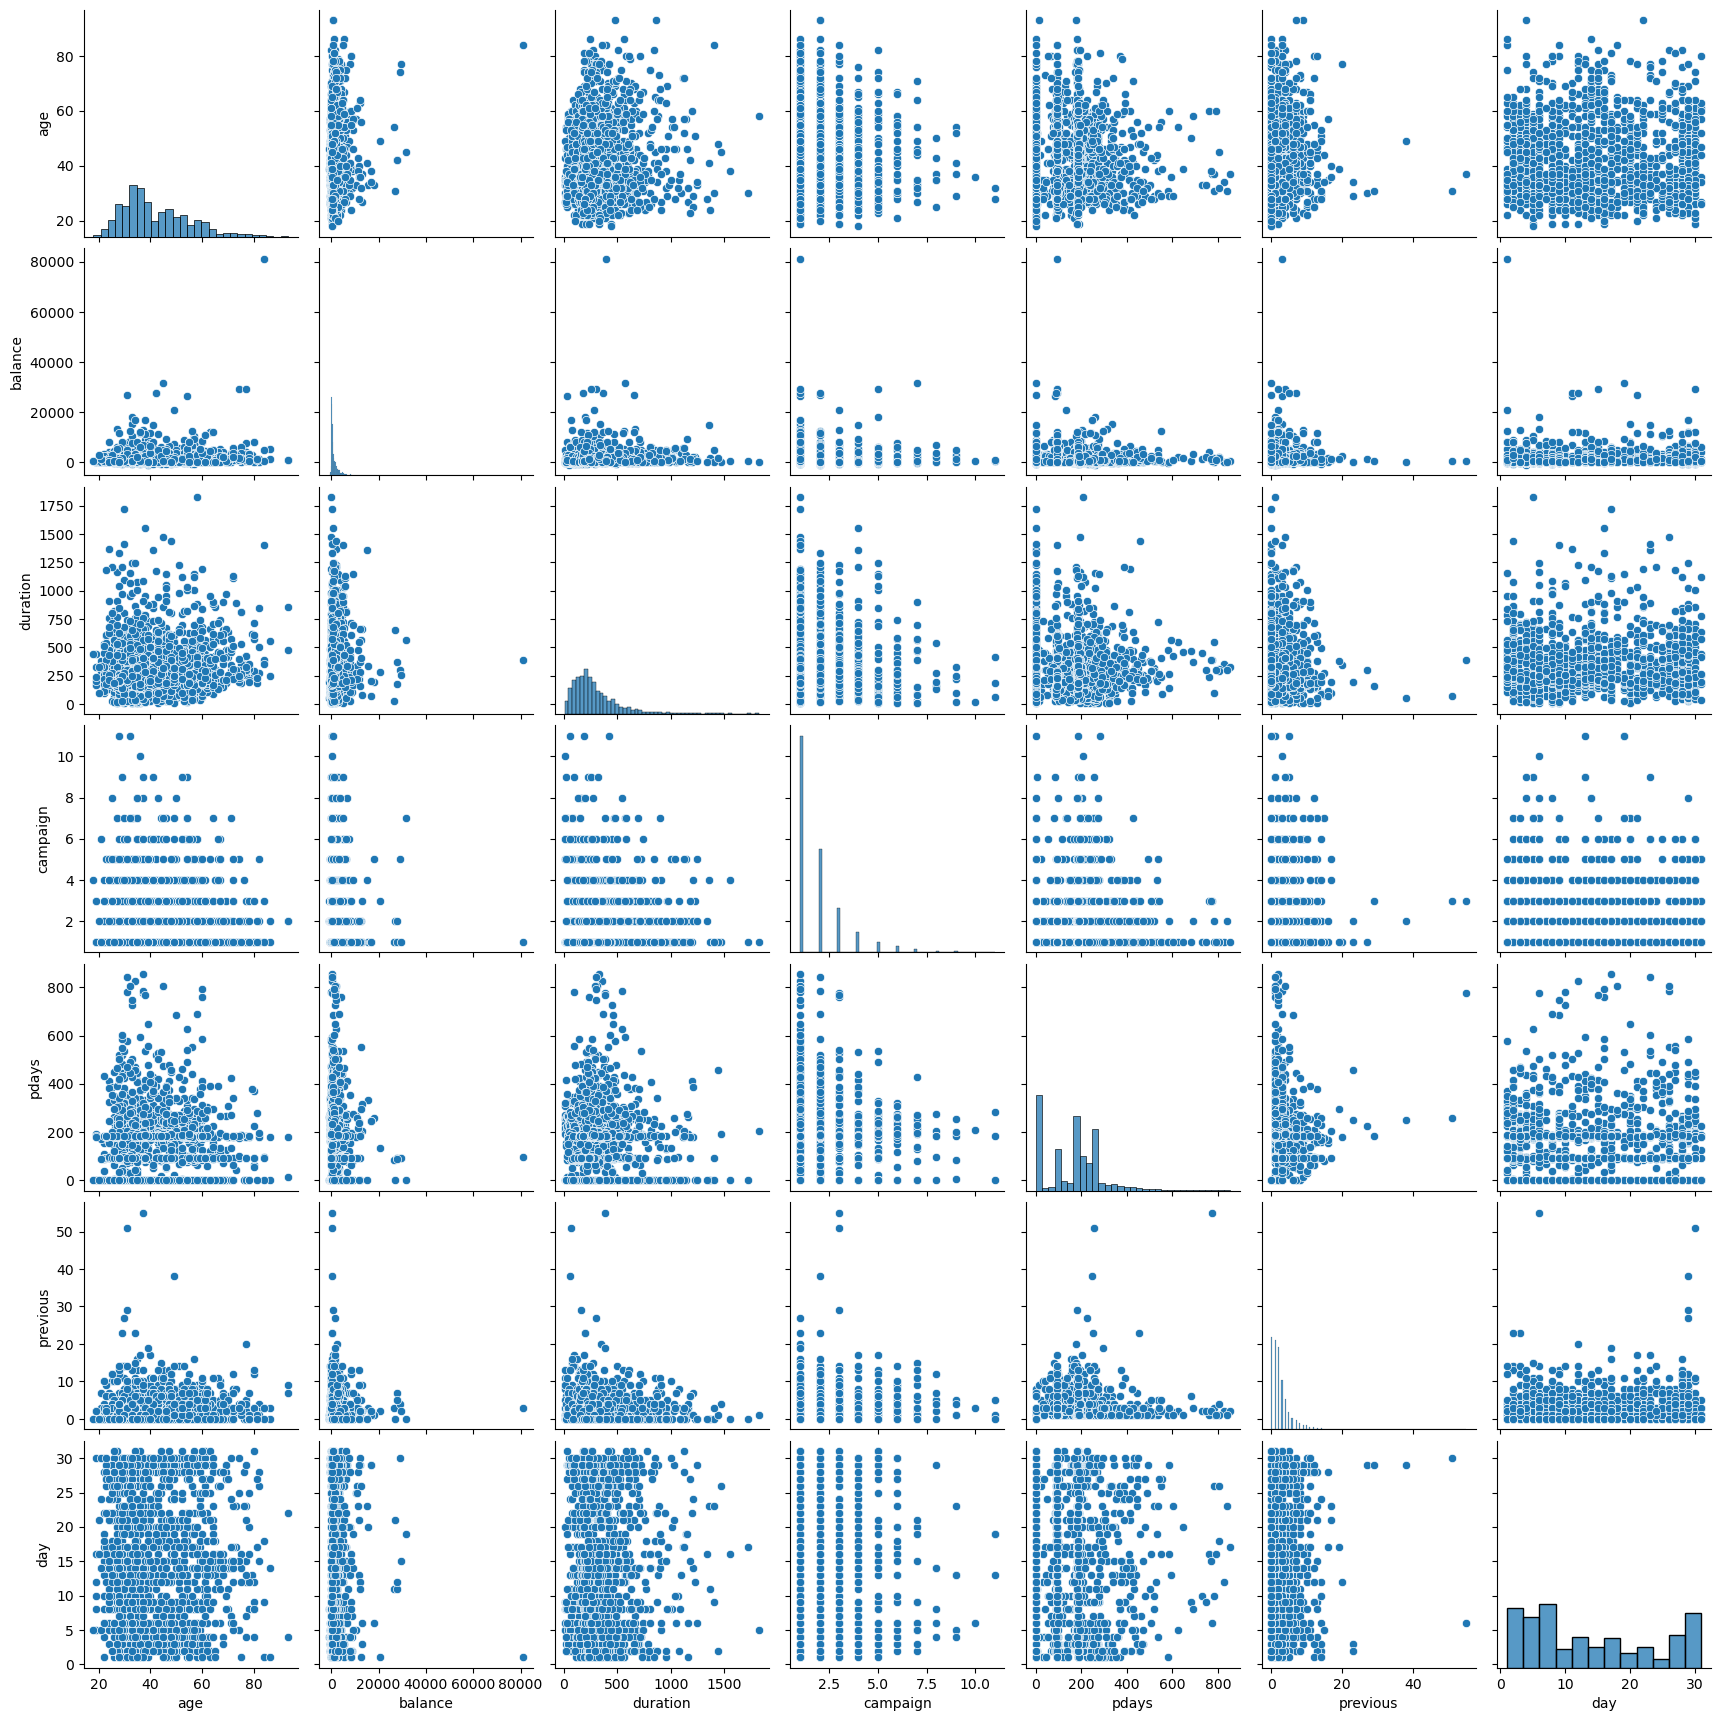

In [10]:
sns.pairplot(data = df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']])
plt.show()

Examining the above pairplot, there are no apparent trends immediately obvious to us. The moderate positive linear relationship between `previous` and `pdays` is clearly influenced by outliers in `previous`.
There is a relatively even distribution between `day` and other variables, which is expected.

### B.3. Quick Examination of Categorical Attributes

The categorical varaibles in this dataset consist of 
* varaibales with categorical variables:
    * `job`: Type of job
    * `martial`: Martial Status
    * `education`: Education Level
    * `contact`: Contact communication type 
    * `month`: Last contact month of the year (date)
    * `poutcome`: Outcome of the previous marketing campaing
    
<br>

* and, variables with binary values:
    * `default`: Is the client in credit default
    * `housing`: Does the client have a housing loan
    * `loan`: Does the client have a personal loan 
    * `subscribed` which contain binary values.
    
We can explore the frequency of each categorical variable. 

In [172]:
frequency_table = df[['job']].value_counts(dropna = False)
print('Frequency Table for Client Job Area:') 
print(frequency_table)

Frequency Table for Client Job Area:
job          
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
NaN               10
dtype: int64


We see that management is the most popoular job category, with almost 25% of indivuals in a management position. There are 10 missing values in the job variable.

In [173]:
frequency_table = df[['marital']].value_counts(dropna = False)
print('Frequency Table for Client Martial Status:') 
print(frequency_table)

Frequency Table for Client Martial Status:
marital 
married     1111
single       674
divorced     215
dtype: int64


Over 50% of individuals are married, there are no missing values in `martial`.

In [174]:
frequency_table = df[['education']].value_counts(dropna = False)
print('Frequency Table for Client Education Level:') 
print(frequency_table)

Frequency Table for Client Education Level:
education
secondary    995
tertiary     684
primary      217
NaN          104
dtype: int64


Almost half (995) of individuals have a secondary education. There are 104 missing values for education level. 

In [175]:
frequency_table = df[['contact']].value_counts(dropna = False)
print('Frequency Table for Client Contact Method:') 
print(frequency_table)

Frequency Table for Client Contact Method:
contact  
cellular     1663
NaN           191
telephone     146
dtype: int64


There are 191 missing values for `contact`. We can see 83% of indviduals were contacted using cellular, and the rest (146) using telephone. 

In [176]:
frequency_table = df[['month']].value_counts(dropna = False)
print('Frequency Table for Client Contact Month:') 
print(frequency_table)

Frequency Table for Client Contact Month:
month
feb      404
may      333
jan      245
apr      205
jul      167
aug      136
sep      134
jun      104
oct       93
mar       70
nov       68
dec       41
dtype: int64


February is the most common month of last contact in the year, the proportion of individuals last contacted in late winter, spring and summer is higher than that of the proportion of indicuals contacted in autumn. There are no missing values for `month`.

In [177]:
frequency_table = df[['poutcome']].value_counts(dropna = False)
print('Frequency Table for Client Previous Outcome:') 
print(frequency_table)

Frequency Table for Client Previous Outcome:
poutcome
failure     955
NaN         454
success     444
other       147
dtype: int64


There are 454 missing values for `poutcome`, the most common outcome of the previous marketing campaign is 'failure', with almost 50% (995) cases. 

In [178]:
frequency_table = df[['default']].value_counts(dropna = False)
print('Frequency Table for Client Default Credit:') 
print(frequency_table)

Frequency Table for Client Default Credit:
default
no         1985
yes          15
dtype: int64


99.25% of indivuals do not have credit in default, while the remaining 15 individuals do have credit in default. There are no missing values for `default`.

In [179]:
frequency_table = df[['housing']].value_counts(dropna = False)
print('Frequency Table for Client Housing Loan:') 
print(frequency_table)

Frequency Table for Client Housing Loan:
housing
no         1037
yes         963
dtype: int64


Almost 50% (963) individuals have a housing loan, the rest (1,037) do not. There are no missing values .

In [180]:
frequency_table = df[['loan']].value_counts(dropna = False)
print('Frequency Table for Client Personal Loan:') 
print(frequency_table)

Frequency Table for Client Personal Loan:
loan
no      1750
yes      250
dtype: int64


12.5% (250) of individuals have a personal loan, the remaining persons (1750) do not. There are no missing values for `loan`. 

In [181]:
frequency_table = df[['subscribed']].value_counts(dropna = False)
print('Frequency Table for Client Subsciption Outcome:') 
print(frequency_table)

Frequency Table for Client Subsciption Outcome:
subscribed
no            1000
yes           1000
dtype: int64


Looking at the outcome variable `subscribed`, we see an exact split of 50% in each category 'yes' and 'no' with no missing values. This is convenient for our analysis. 

## C. Distribution Analysis for Atributes

### C.1. Numerical Attributes

I will proceed to explore the distirbutions of numerical variables using a combination of visual techniques; namely, histograms and boxplots. 

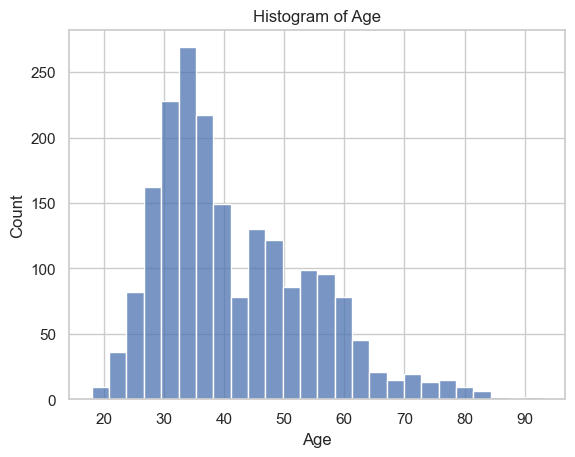

In [198]:
sns.set(style="whitegrid")
plt.title('Histogram of Age')
plt.xlabel('Age')
sns.histplot(x=df['age'], bins=26)
plt.show()

From the histogram above, the distribution of `age` is approximately normal, with right skewness. We will use a boxplot to investigate the extreme values causing skewness. 

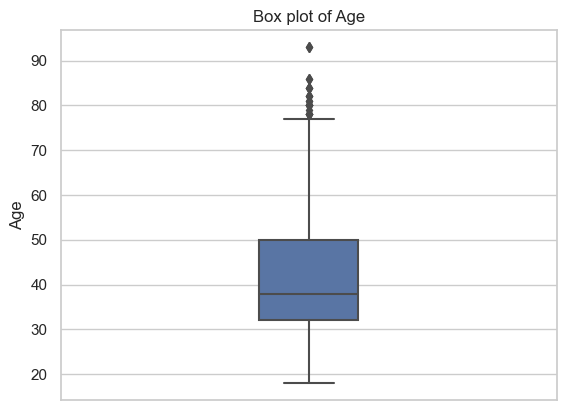

In [94]:
sns.boxplot(y=df['age'], orient='v', width=0.2)
plt.title('Box plot of Age')
plt.ylabel("Age")
plt.show()

From the boxplot above, we can identify the outliers, those are individuals with an age greater than approximately 75. We can compare the distribution of age between groups of the categorical varaibles. 

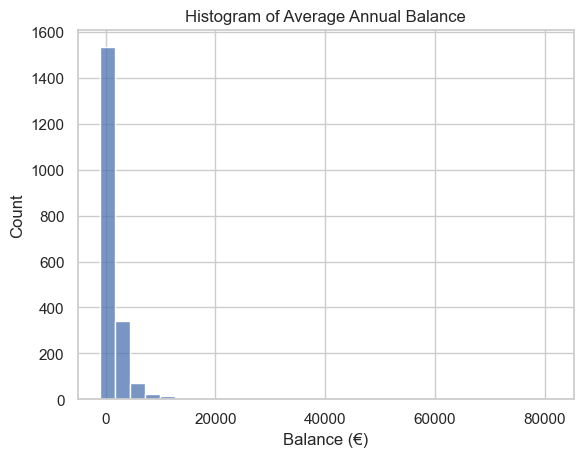

In [96]:
sns.histplot(x=df['balance'], bins=30)
plt.title('Histogram of Average Annual Balance')
plt.xlabel("Balance (€)")
plt.show()

From the histogram of `balance`, we see the distribution is extremely right skewed. Most individuals have a value between 0-5,000 euros. There is a possible outlier at approximtely 80,000 euro, we will investigate this with a boxplot.  

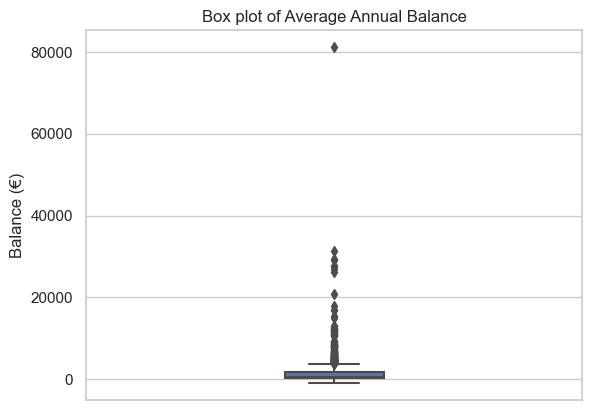

In [199]:
sns.boxplot(y=df['balance'], orient='v', width=0.2)
plt.title('Box plot of Average Annual Balance')
plt.ylabel("Balance (€)")
plt.show()

The skeweness of `balance` is most apparent using the above boxplot. We can clearly see that the median average yearly balance is 550 euro as outlined in part B.1. There is an obvious outlier at 80,000 euros, and similar outliers ranging from approximately 5,000 to 30,000 euro.

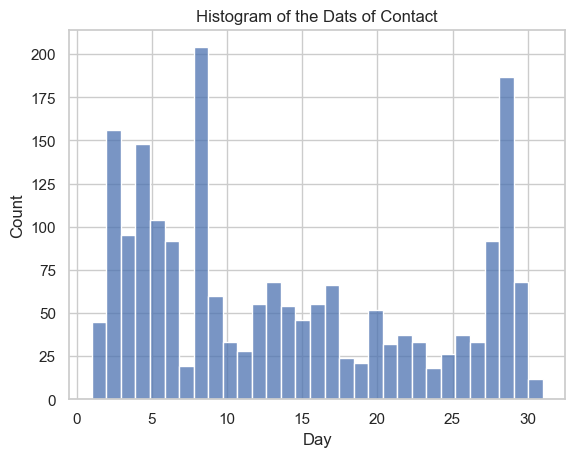

In [105]:
sns.histplot(x=df['day'], bins=31)
plt.title('Histogram of the Dats of Contact')
plt.xlabel("Day")
plt.show()

The occurances of each day in the month are plotted (from 1-31). There are peaks at the begining and end of the month, there is a smaller peak in the middle of the month. The greatest number of calls in a day is around day 8 of the month. 

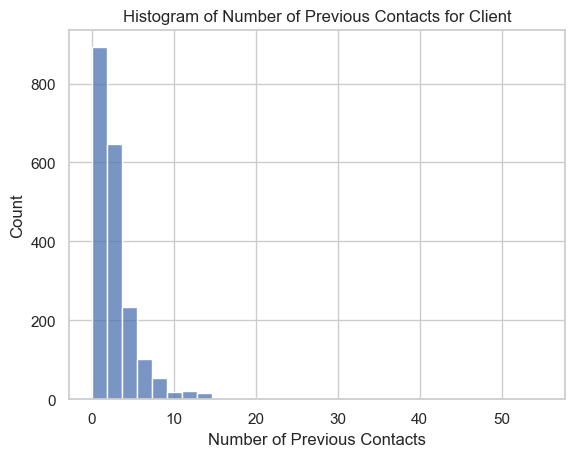

In [200]:
sns.histplot(x=df['previous'], bins=30)
plt.title('Histogram of Number of Previous Contacts for Client')
plt.xlabel("Number of Previous Contacts")
plt.show()

The number of previous candidates are highly right skewed, there are many occuracnes with 0-5 contacts, and fewer greater than 10. Lets investigate outliers with a boxplot. 

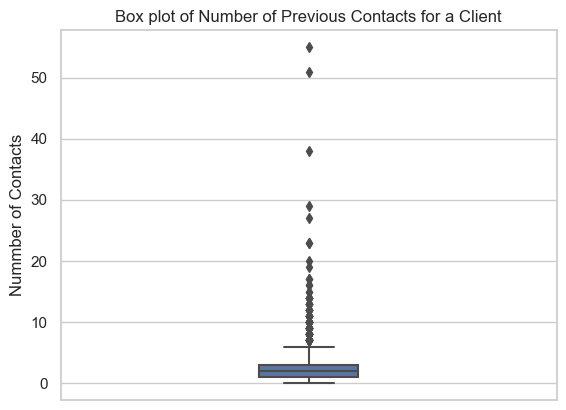

In [201]:
sns.boxplot(y=df['previous'], orient='v', width=0.2)
plt.title('Box plot of Number of Previous Contacts for a Client')
plt.ylabel("Nummber of Contacts")
plt.show()

There are outliers apparent in the above boxplot, we can see some observations with over 50 previous contacts - this is leading to the skewed distribution observered above.

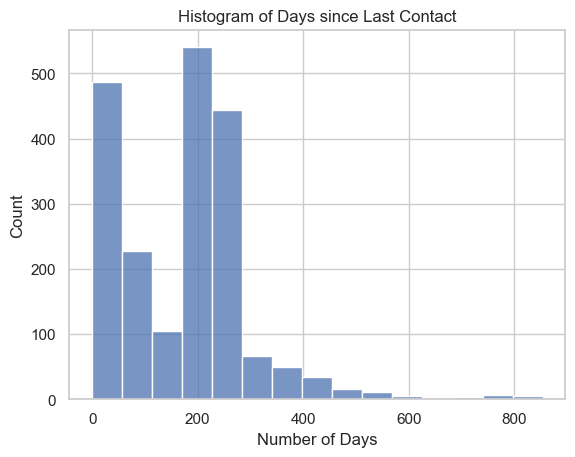

In [244]:
sns.histplot(x=df['pdays'], bins=15)
plt.title('Histogram of Days since Last Contact')
plt.xlabel("Number of Days")
plt.show()

The number of days since last contacted has an approximately multi-modal distribution. There are a large proportion of clients last contacted between 200-300 days ago, and a similar peak at approximately 0 days ago. This peak is due to the -1 value for clients who were not previously contacted.

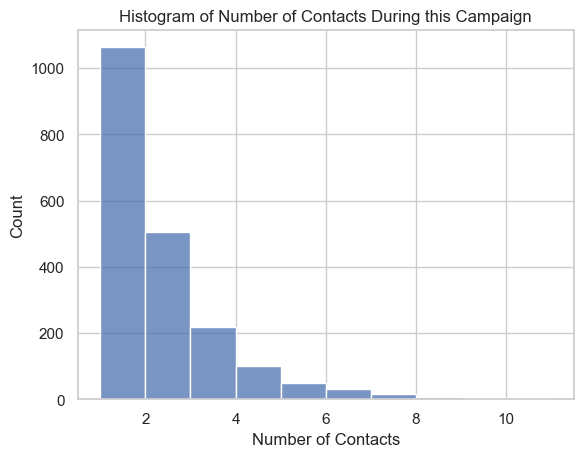

In [125]:
sns.histplot(x=df['campaign'], bins=10)
plt.title('Histogram of Number of Contacts During this Campaign')
plt.xlabel("Number of Contacts")
plt.show()

We see the number of contacts during this campaign is right skewed. A large proportion of clients were contacted between 0 and 3 times. There are some larger values at around 10 contacts. 

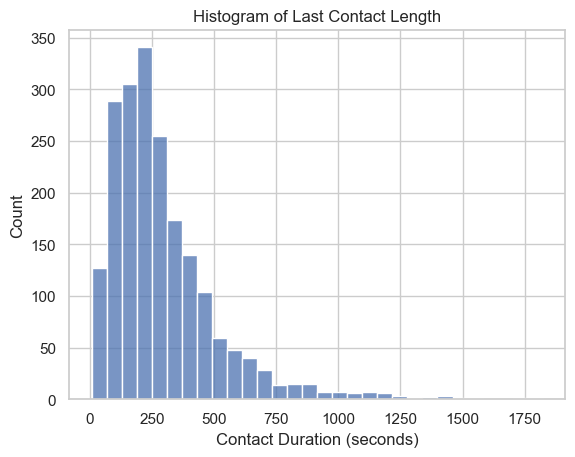

In [202]:
sns.histplot(x=df['duration'], bins=30)
plt.title('Histogram of Last Contact Length')
plt.xlabel("Contact Duration (seconds)")
plt.show()

The contact duration in seconds is approximately normally distributed with right skewness. There are some outliers at 1500 seconds and above. The majority of observations had a contact lenght less than 500 seconds.  

### C.2. Categorical Attributes


#### C.2.1 Previous Outcome and Housing

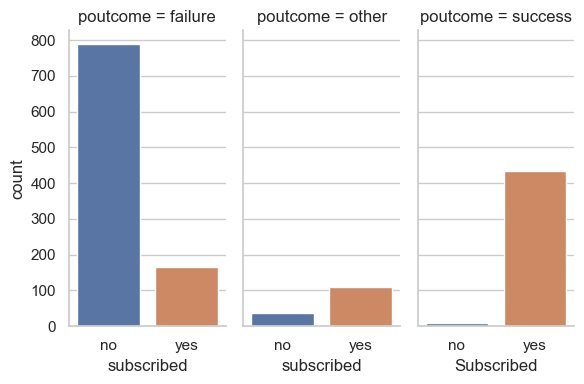

In [204]:
count_df = df.groupby(["poutcome", "subscribed"]).size().reset_index(name="count")

# Create the catplot
sns.catplot(data=count_df, kind="bar", x="subscribed", y="count", col="poutcome", height=4, aspect=.5)
plt.xlabel("Subscribed")  # Add a common x-label
plt.show()

For this campaign, most subscribers have subscirbed in the previous outcome. Similary, most of the non-subscibors did not subscribe in the previous campaign. More individuals from the 'other' outcomes subscribed in this campaign rather than not subscribing. To see this clearer, we can calculate the ratio of subscribers for each previous outcome.

In [211]:
ft =  df.pivot_table(values='subscribed',
                                index='poutcome',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
print(ft)


          subscribed
poutcome            
failure     0.174869
other       0.755102
success     0.977477


Here we can infer that the probability of a client subscribing is 0.977 for clients who had a sucessful outcome in the previous campaign. Similary, the probability of non-subscription is 1-0.17 = 0.83 for clients who did not have a sucessful outcome in the previous campaign. 

We can plot the subscriptions based on the presence of a housing loan. 

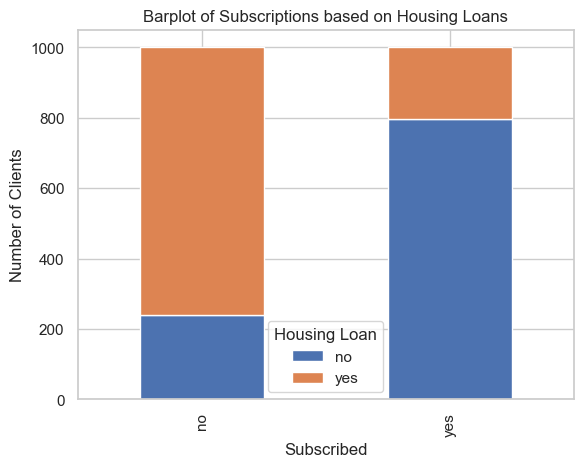

In [224]:
crosstab_hs = pd.crosstab(df['subscribed'], df['housing'])
crosstab_hs.plot(kind='bar', stacked=True)
plt.ylabel('Number of Clients')
plt.xlabel("Subscribed")
plt.title("Barplot of Subscriptions based on Housing Loans")
plt.legend(title = 'Housing Loan')
plt.show()

We can see the 50-50 split of subscriptions and non subscriptions contains a different amount of clients with housing loans. There are more individuls with housing loans in the non-subscription group. Lets investigate this further in unison with `poutcome`.

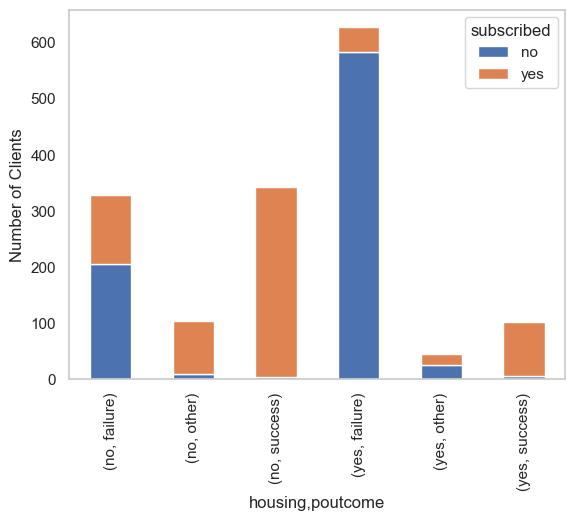

In [233]:
crosstab_hsp = pd.crosstab([df['housing'], df['poutcome']], df['subscribed'])
crosstab_hsp.plot(kind='bar', stacked=True, grid=False)
plt.ylabel('Number of Clients')
plt.show()

We can see some key points in this barplot: 
* There is a large number of non-subscribers in the groups of indiduals with a failed previous campaign. 
* The majority of individuals with a previous sucess are subscribers, regardless of the presence of housing loans.

We can further explore the proportions of `subscribed` for each combination of `poutcome` and `housing`. 

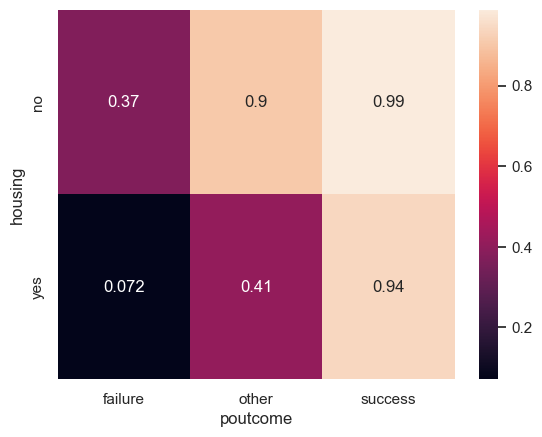

In [234]:
pivot_table = df.pivot_table(values='subscribed', 
                           index='housing', 
                           columns='poutcome',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table, annot=True)
plt.show()

We must be careful here considering the small number of clients in the (yes, other) combination, the inferences may not be valid. We conclude that clients with previous successful outcomes have a strong lihelihood of subscribing regardless of housing loan presence. We can hypothesise that `subscribed` does not differ across `housing`, but true conclusions will require t-tests. 

#### C.2.2 Contact Method

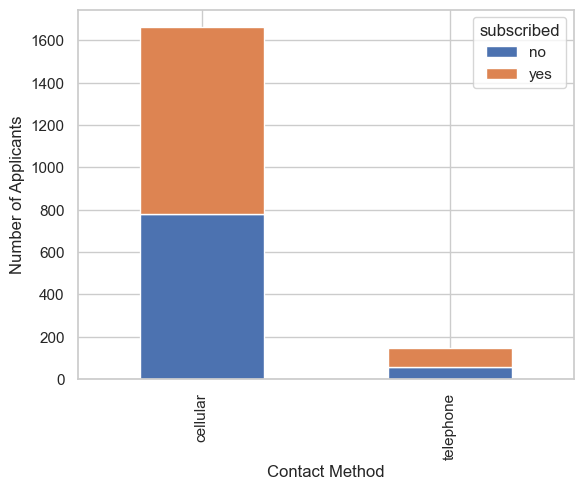

In [235]:
crosstab_com = pd.crosstab(df['contact'], df['subscribed'])
crosstab_com.plot(kind='bar', stacked=True)
plt.ylabel('Number of Applicants')
plt.xlabel("Contact Method")
plt.show()

We clearly see, the most popular contact method is cellular phone, where there is an approximate 50-50 split for the number of subscibors and non-subscribors. There are less than 200 cases of telephone contact methods, and there appears to be more successes than non-subscriptions. We can get exact figures to investigate this. 

In [236]:
ft =  df.pivot_table(values='subscribed',
                                index='contact',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
print(ft)


           subscribed
contact              
cellular     0.532171
telephone    0.623288


We see the 62% of clients contacted by telephone subscribed. Similarly, 53% of clients contacted by cellular phone subscribed. In both cases, there are more subscribers than non-subscirbers; however, the ratio of subscribers to non-subscibors is greater for clients contacted using telephone. This could be used to support a hypothesis that telephone is more sucessful than cellular as a contact method for subscriptions; however, we would need to perform statistical tests.
Note: There are 161 missing values, which are not shown here.

## E. Multivariate Analysis

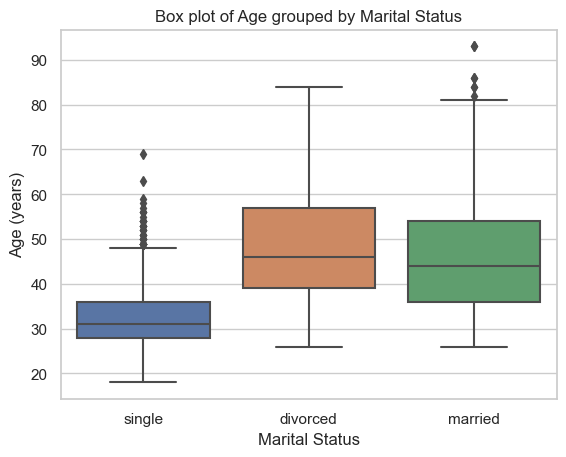

In [237]:
sns.boxplot(x='marital', y='age', data=df)
plt.title('Box plot of Age grouped by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age (years)')
plt.show()

We can see clear differences in the median `age` of single clients compared to the medial age of those with a 'divorced' or 'married' `marital status`. The oldest individuals in the marketing campaign are married, while the youngest are single.

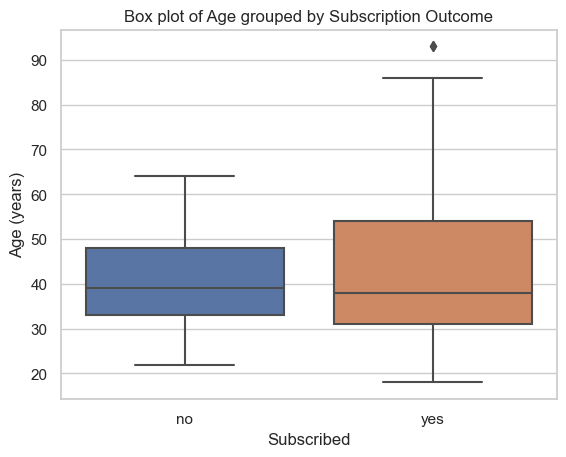

In [238]:
sns.boxplot(x='subscribed', y='age', data=df)
plt.title('Box plot of Age grouped by Subscription Outcome')
plt.xlabel('Subscribed')
plt.ylabel('Age (years)')
plt.show()

We see greater variablility in the `age` of individuals that subscribed after the marketing campaign. The median age for each group is approcimately equal. 

We can now consider the information on the marketing campaign compared to the client outcome. Firstly lets look at the days contacted for those who subscribed compared to those who did not. 

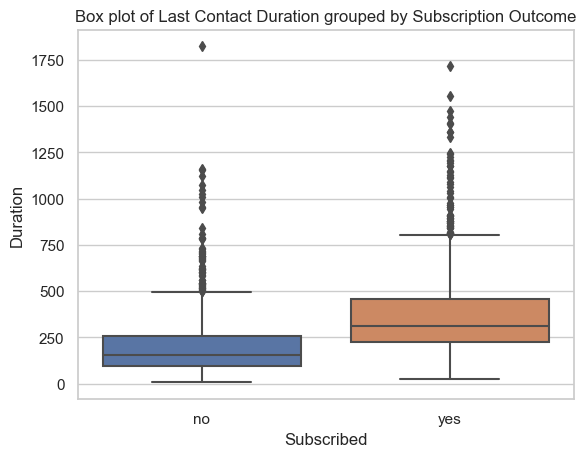

In [53]:
sns.boxplot(x='subscribed', y='duration', data=df)
plt.title('Box plot of Last Contact Duration grouped by Subscription Outcome')
plt.xlabel('Subscribed')
plt.ylabel('Duration')
plt.show()

We can clearly see a difference in the median seconds of last contact duration between the groups who did and did not subscribe. The median duration of last contact is greater for subscribers, with more variablility, and more outliers, compared to the non-subscribers. 
We must recall that there are many 0 values for the call duration of non-subscirbers. 

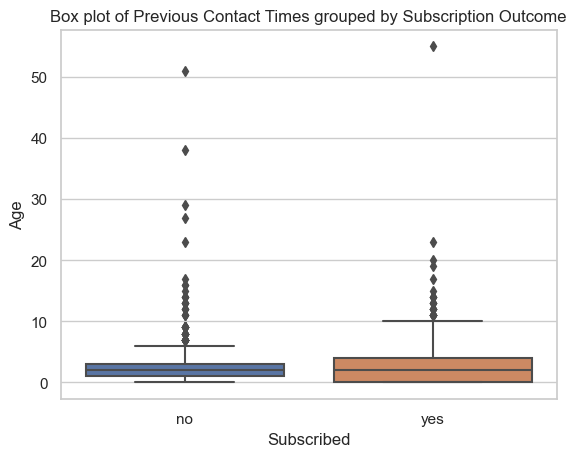

In [240]:
sns.boxplot(x='subscribed', y='previous', data=df)
plt.title('Box plot of Previous Contact Times grouped by Subscription Outcome')
plt.xlabel('Subscribed')
plt.ylabel('Age')
plt.show()

We can see the median number of contacts performed before this campaign is similar for both subscribers and non-subscribers. However, there is greater variablility amongst the subscribers. 

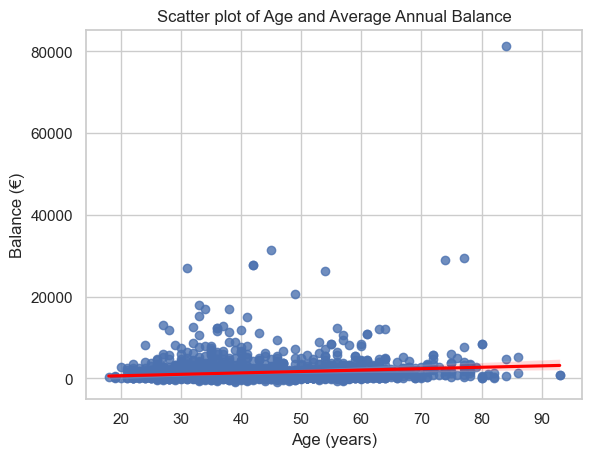

In [241]:
sns.regplot(data=df, x='age', y='balance', line_kws={"color":"red"})
plt.title('Scatter plot of Age and Average Annual Balance')
plt.xlabel("Age (years)")
plt.ylabel("Balance (€)")
plt.show()

There is a weak positive relationship between age and balance, suggesting an increase in age is associated with an increase in average annual balance. This does not imply causation and is simply observed correlation. The linear regression line clearly has a positive slope low in magnitude, this summarises the weak positive linear relationship. Outliers are apparent, especially at the 85 age mark. 

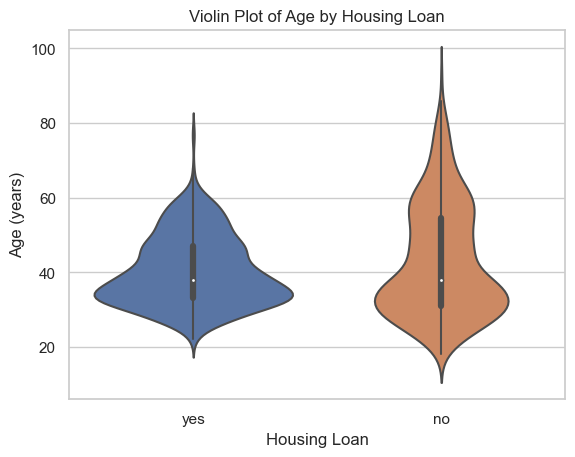

In [143]:
sns.violinplot(data=df, x='housing', y='age')
plt.title('Violin Plot of Age by Housing Loan')
plt.xlabel("Housing Loan")
plt.ylabel('Age (years)')
plt.show()

We can see from the above violin plot, the age distribution for individuals without a housing loan is far more spread than those who do have a housing loan. The mode of the distribution for those with a housing loan is at approx. 35 years. These conclusions make intuitive sense considering the common ages for morgage applications. We could further analuse this by including education level. 

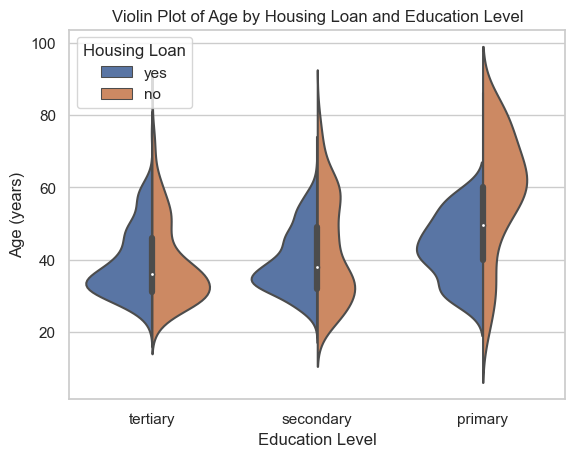

In [144]:
sns.violinplot(data=df, x='education', y='age', hue='housing', split=True)
plt.title('Violin Plot of Age by Housing Loan and Education Level')
plt.xlabel("Education Level")
plt.legend(title = 'Housing Loan')
plt.ylabel('Age (years)')
plt.show()

For individuals with housing loans, the age distributions are similar for those with tertiary and seconfary education. The individuals with primary education and housing loans appear to have a larger mean age. A similar trend appears for those without housing loans. 

## F. Multivariate Analysis

In response to the research questions from B.1, we can conclude (based on observation, not inference), that: 

* The proportion of subscriptions differs from outcomes of the previous campaign. There is no apparent difference in the likelihood of subscription when grouping by housing loans and previous outcomes. 
* The distribution of age differs across education level and housing loans.
* The telephone method was more sucessful than cellular contact for signing up customers. 
